## Numerical Encoding

While working on datasets it is quite common we come across numerical data that has huge variations. In order to be able to use such data, first we might need to format the values using Encoding process. <br>

Numerical Encoding can be done in different ways. Here I'm going to discuss about following encoding techniques and how to implement them on our data. 

    Discretization (Binning)
    Binarization
    
## Discretization (Binning)
Discretization is a process where we transform the continuous values into discrete values by creating intervals. These intervals are also called as bins and hence comes the name Binning. <br>
Discretization helps to handle Outliers and improves the spread of the values.

### Types of Binning:
    Unsupervised Binning
    Supervised Binning
    Custom Binning
    
### Unsupervised Binning:
    Equal width Binning (Uniform Binning)
    Equal frequency Binning
    K means Binning
    
## Binarization
Binarization is process whn continuous data is converted into binary format.<br><br><br><br>

In [250]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer

from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter(action='ignore')

## Discretization (Binning)
Let's see how Discretization works.

In [147]:
# dataframe
titanic = pd.read_csv('./Datasets/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [148]:
# dropping missing values
titanic.dropna(inplace=True)

In [149]:
# number of cols and rows of df
titanic.shape

(714, 3)

In [150]:
titanic.head(1)

,Survived,Age,Fare
0,0,22.0,7.25


## Checking accuracy before transformation

In [164]:
# split input output
X = titanic.iloc[:,1:3]
y = titanic.iloc[:, 0]

In [152]:
# split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model object
DT = DecisionTreeClassifier()

# fit
DT.fit(X_train, y_train)

# predict
y_pred = DT.predict(X_test)

# accuracy
print(accuracy_score(y_test, y_pred))

# cross validation
print(np.mean(cross_val_score(DT, X, y, cv=10, scoring='accuracy')))

0.6293706293706294
0.6359154929577464


Accuracy is around 63% before transformation<br><br><br>

## Applying Discretization(Binning)

In [157]:
# binning objects
kbin_age = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='kmeans')
kbin_fare = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='kmeans')

# ColumnTransformer objects
trf = ColumnTransformer([('age', kbin_age, [0]),
                          ('fare', kbin_fare, [1])])

# transformation
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

You can check what is happening inside the algorithms with following code

In [85]:
# details of all objects in transformer
trf.named_transformers_

# details of particilar objects in transformer
trf.named_transformers_['age']

# number of bins
trf.named_transformers_['age'].n_bins_

# quantile values (min and max of each interval)
trf.named_transformers_['age'].bin_edges_

array([array([ 0.42      ,  4.29906863,  8.20833333, 12.58      , 16.85916667,
              20.58940763, 24.6236738 , 28.58154878, 32.63418737, 36.83035714,
              40.66071429, 44.4297619 , 48.4       , 52.52083333, 56.76325758,
              60.40909091, 63.41666667, 67.66666667, 72.25      , 77.        ,
              80.        ])                                                   ],
      dtype=object)

### Analyze data transformation

Here I created a dataframe to see how values of Age and Fare columns are transformed into ordinal values (bins) now.<br>
From the data frame we can find out two things.
1. We can compare how the age and fare values are encoded into bins.
2. We can also check in what interval each ordinal value falls into.

In [143]:
transformation = pd.DataFrame({'age before': X_train.Age, 
                               'age after': X_train_trf[:,0],
                               'age intervals': pd.cut(x=X_train['Age'], 
                                                       bins = trf.named_transformers_['age'].bin_edges_[0].tolist()),
                               'fare before': X_train.Fare, 
                               'fare after': X_train_trf[:,1],
                               'fare intervals':pd.cut(x=X_train['Fare'], 
                                                       bins = trf.named_transformers_['fare'].bin_edges_[0].tolist())
                              })
transformation.sample(10)

,age before,age after,age intervals,fare before,fare after,fare intervals
761,41.0,10.0,"(40.661, 44.43]",7.1250,1.0,"(5.036, 18.008]"
492,55.0,13.0,"(52.521, 56.763]",30.5000,2.0,"(18.008, 31.707]"
255,29.0,7.0,"(28.582, 32.634]",15.2458,1.0,"(5.036, 18.008]"
89,24.0,5.0,"(20.589, 24.624]",8.0500,1.0,"(5.036, 18.008]"
6,54.0,13.0,"(52.521, 56.763]",51.8625,5.0,"(49.303, 54.107]"
759,33.0,8.0,"(32.634, 36.83]",86.5000,9.0,"(82.555, 100.196]"
341,24.0,5.0,"(20.589, 24.624]",263.0000,18.0,"(255.156, 387.56]"
37,21.0,5.0,"(20.589, 24.624]",8.0500,1.0,"(5.036, 18.008]"
487,58.0,14.0,"(56.763, 60.409]",29.7000,2.0,"(18.008, 31.707]"
666,25.0,6.0,"(24.624, 28.582]",13.0000,1.0,"(5.036, 18.008]"


### Continuing to next steps, fit and predict

In [144]:
# model object
DT = DecisionTreeClassifier()

# fit
DT.fit(X_train_trf, y_train)

# predict
y_pred = DT.predict(X_test_trf)

# accuracy
print(accuracy_score(y_test, y_pred)) 

# cross validation
print(np.mean(cross_val_score(DT, X, y, cv=10, scoring='accuracy')))

0.6573426573426573
0.6330985915492957


I have observed when I gave bins value as 10 then accuracy was around 60%, but once I creased bins=20 then the accuracy increased to 65%, <br>
This is another good tip to keep changing values to check which gives close accuracy.

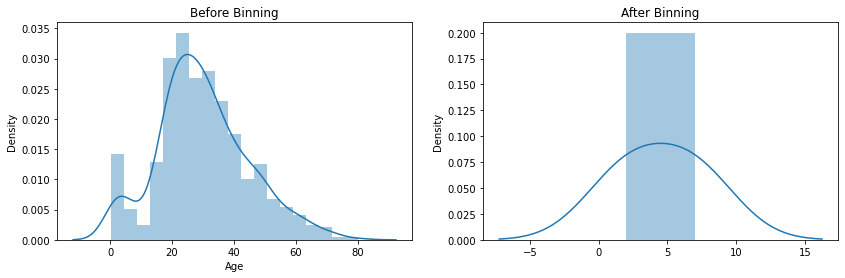

In [155]:
# plotting
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Before Binning")

plt.subplot(122)
sns.distplot(X_train_trf[0])
plt.title("After Binning")

plt.show()

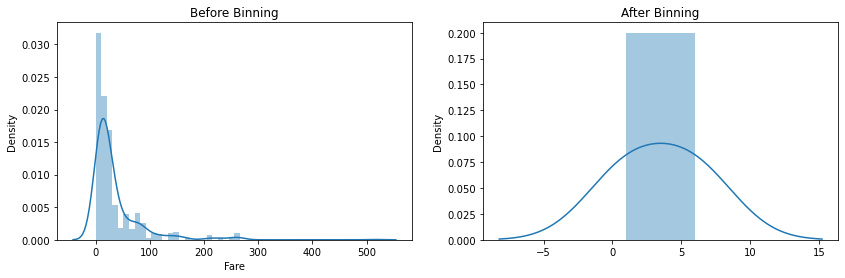

In [156]:
# plotting
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title("Before Binning")

plt.subplot(122)
sns.distplot(X_train_trf[1])
plt.title("After Binning")

plt.show()

Now, lets try other strategies to, <br>
Here, to try other strategies and check transformation, I have created a function, so that we can quickly get analysis rather than going back to the code and manually changing everything. <br>
We just need to mention strategy (uniform, quantile, kmeans) and number of bins.

In [216]:
def binning(bins, strategy):
    
    # binning objects
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    # ColumnTransformer objects
    trf = ColumnTransformer([('age', kbin_age, [0]),
                              ('fare', kbin_fare, [1])])

    # transformation
    X_trf = trf.fit_transform(X)

    # model object
    DT = DecisionTreeClassifier()

    # cross validation
    print(np.mean(cross_val_score(DT, X, y, cv=10, scoring='accuracy')))

    # plotting
    plt.figure(figsize=(14,8))

    plt.subplot(2,2,1)
    sns.distplot(X['Age'])
    plt.title("Age Before Binning")

    plt.subplot(2,2,2,)
    sns.distplot(X_trf[:,0])
    plt.title("Age After Binning")

    plt.subplot(2,2,3)
    sns.distplot(X['Fare'])
    plt.title("Fare Before Binning")

    plt.subplot(2,2,4)
    sns.distplot(X_trf[:,1])
    plt.title("Fare After Binning")
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    
    plt.show()

0.6317097026604068


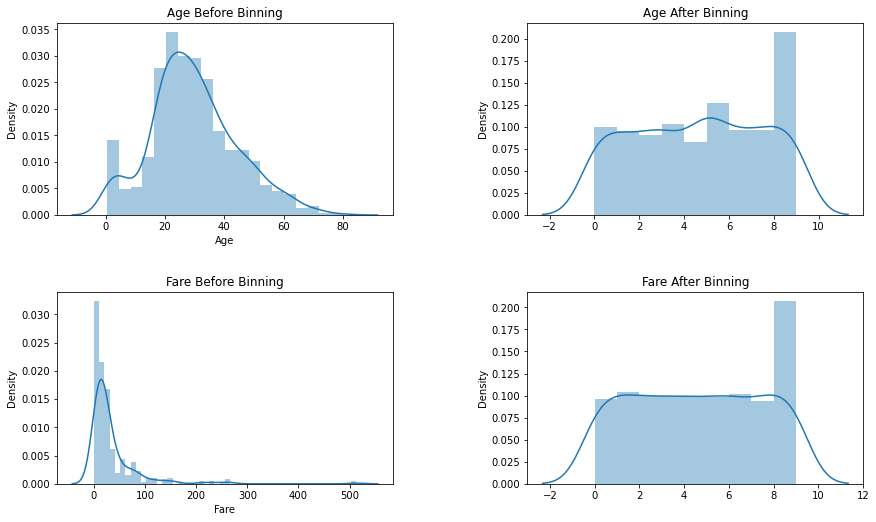

In [217]:
binning(10, 'quantile')

0.6303012519561815


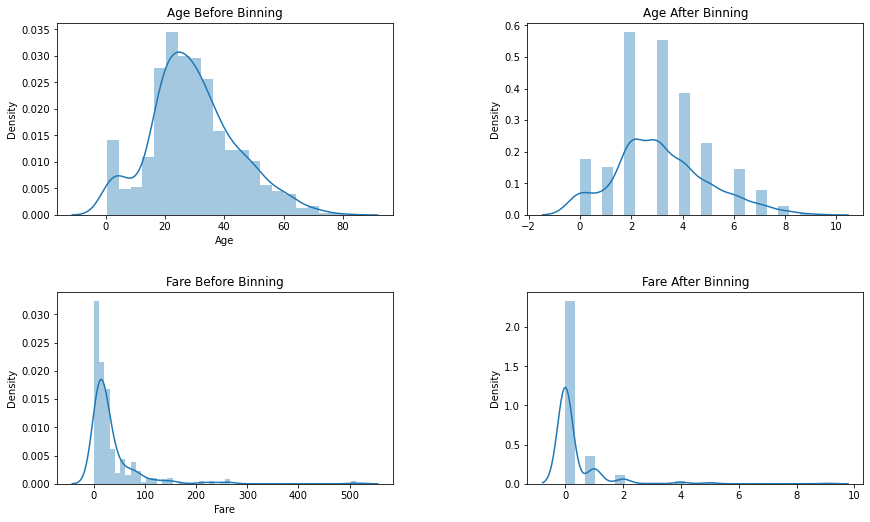

In [218]:
binning(10, 'uniform')

## Binarization

In [256]:
df = pd.read_csv('./Datasets/train.csv', usecols=['Age', 'Fare', 'SibSp', 'Parch', 'Survived'])

In [257]:
df.dropna(inplace=True)

In [258]:
df.head(1)

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.25


In [259]:
df['Family'] = df['SibSp'] + df['Parch']
df.drop(columns=['SibSp', 'Parch'], inplace=True)
df.head(20)

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0
6,0,54.0,51.8625,0
7,0,2.0,21.0750,4
8,1,27.0,11.1333,2
9,1,14.0,30.0708,1
10,1,4.0,16.7000,2


In [260]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Without binarization

In [262]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

print(accuracy_score(y_test, y_pred))

print(np.mean(cross_val_score(DT, X, y, cv=10, scoring='accuracy')))


0.6223776223776224
0.647085289514867


In [266]:
# binarization object
Bin = Binarizer(copy = False) # copy=False means I need changes in existing column rather yhan creating copy of column

# transformer object
trf = ColumnTransformer([('bin', Bin, ['Family'])],
                       remainder = 'passthrough')

# transformation
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [267]:
# checking how 'Family' column data is binarized now
pd.DataFrame(X_train_trf, columns=['Family', 'Age', 'Fare'])

,Family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [277]:
# model object
DT = DecisionTreeClassifier()

# fit
DT.fit(X_train_trf, y_train)

# predict
y_pred2 = DT.predict(X_test_trf)

# accuracy
print(accuracy_score(y_test, y_pred2))

# cross validation
X_trf = trf.fit_transform(X)
print(np.mean(cross_val_score(DT, X_trf, y, cv=10, scoring='accuracy')))

0.6223776223776224
0.6219874804381847


We can observe there is slight improvement in the accuracy here. But we can keep trying different ways to get more acurate result.

## Summary

In this we have discussed how to encode numerical data using different encoding techniques from scikit learn library. What we have done is continuous to categorical transformation of the data.